TensorFlow: 2.19.0
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


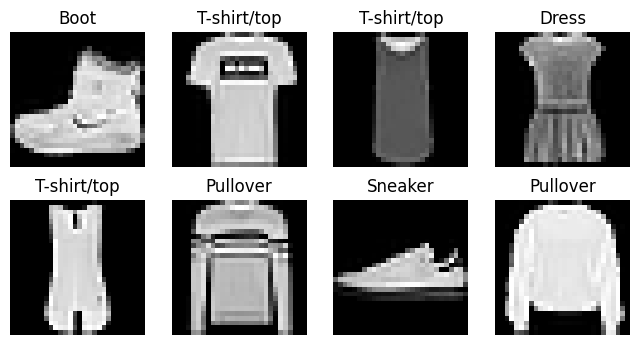

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
844/844 - 11s - 13ms/step - accuracy: 0.7785 - loss: 0.6072 - val_accuracy: 0.8528 - val_loss: 0.3938
Epoch 2/12
844/844 - 3s - 4ms/step - accuracy: 0.8565 - loss: 0.4021 - val_accuracy: 0.8785 - val_loss: 0.3308
Epoch 3/12
844/844 - 3s - 3ms/step - accuracy: 0.8748 - loss: 0.3480 - val_accuracy: 0.8885 - val_loss: 0.3004
Epoch 4/12
844/844 - 3s - 3ms/step - accuracy: 0.8863 - loss: 0.3145 - val_accuracy: 0.8962 - val_loss: 0.2788
Epoch 5/12
844/844 - 3s - 3ms/step - accuracy: 0.8945 - loss: 0.2864 - val_accuracy: 0.8995 - val_loss: 0.2641
Epoch 6/12
844/844 - 3s - 4ms/step - accuracy: 0.9024 - loss: 0.2685 - val_accuracy: 0.9052 - val_loss: 0.2570
Epoch 7/12
844/844 - 5s - 6ms/step - accuracy: 0.9076 - loss: 0.2512 - val_accuracy: 0.9093 - val_loss: 0.2388
Epoch 8/12
844/844 - 3s - 3ms/step - accuracy: 0.9133 - loss: 0.2358 - val_accuracy: 0.9058 - val_loss: 0.2520
Epoch 9/12
844/844 - 3s - 3ms/step - accuracy: 0.9178 - loss: 0.2224 - val_accuracy: 0.9120 - val_loss: 0.2300

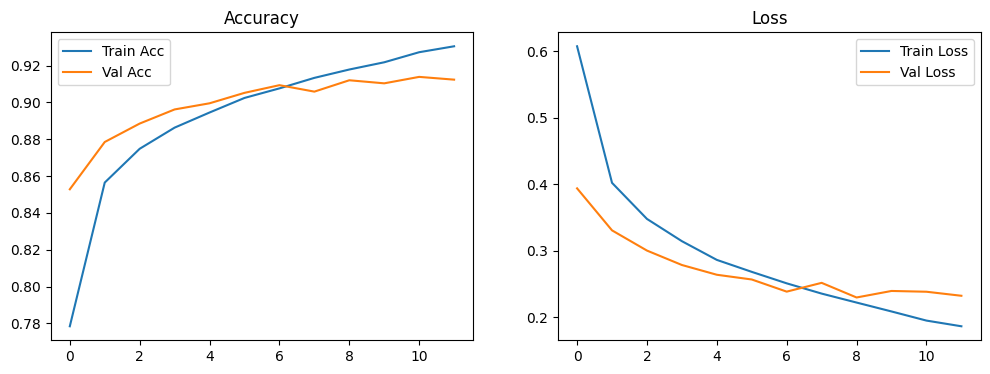

🔥 Final Test Accuracy: 90.71 %
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


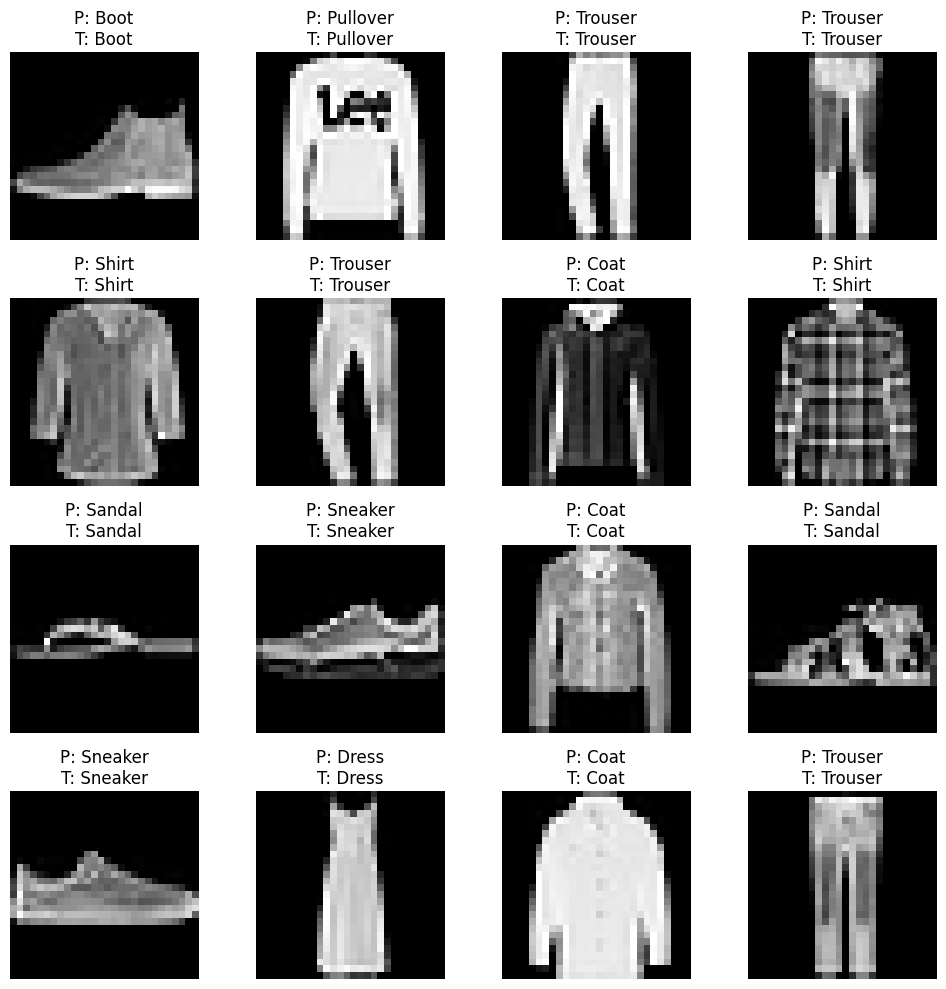

In [1]:
# ============================================================
# 1. IMPORTS
# ============================================================
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow:", tf.__version__)

# ============================================================
# 2. LOAD DATASET
# ============================================================
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize and reshape for CNN
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1) / 255.0

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Boot"
]

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

# ============================================================
# 3. VISUALIZE SAMPLE IMAGES
# ============================================================
plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()

# ============================================================
# 4. BUILD CNN MODEL
# ============================================================
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# ============================================================
# 5. TRAIN CNN MODEL
# ============================================================
history = model.fit(
    x_train, y_train,
    epochs=12,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)

# ============================================================
# 6. PLOT ACCURACY & LOSS CURVES
# ============================================================
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss")
plt.legend()

plt.show()

# ============================================================
# 7. FINAL EVALUATION ON TEST DATA
# ============================================================
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("🔥 Final Test Accuracy:", round(test_acc * 100, 2), "%")

# ============================================================
# 8. PREDICTION ON TEST IMAGES
# ============================================================
pred = model.predict(x_test[:16])
pred_classes = np.argmax(pred, axis=1)

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"P: {class_names[pred_classes[i]]}\nT: {class_names[y_test[i]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()
